In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def ma(X, w=None):
    if(not w): w = len(X)
    avgs = []
    for i in range(len(X)):
        numer = np.sum(X[max(0, i-w+1):i+1])
        den = min(w, i+1)
        avgs.append(numer/den)
    return np.array(avgs)

## First Plot

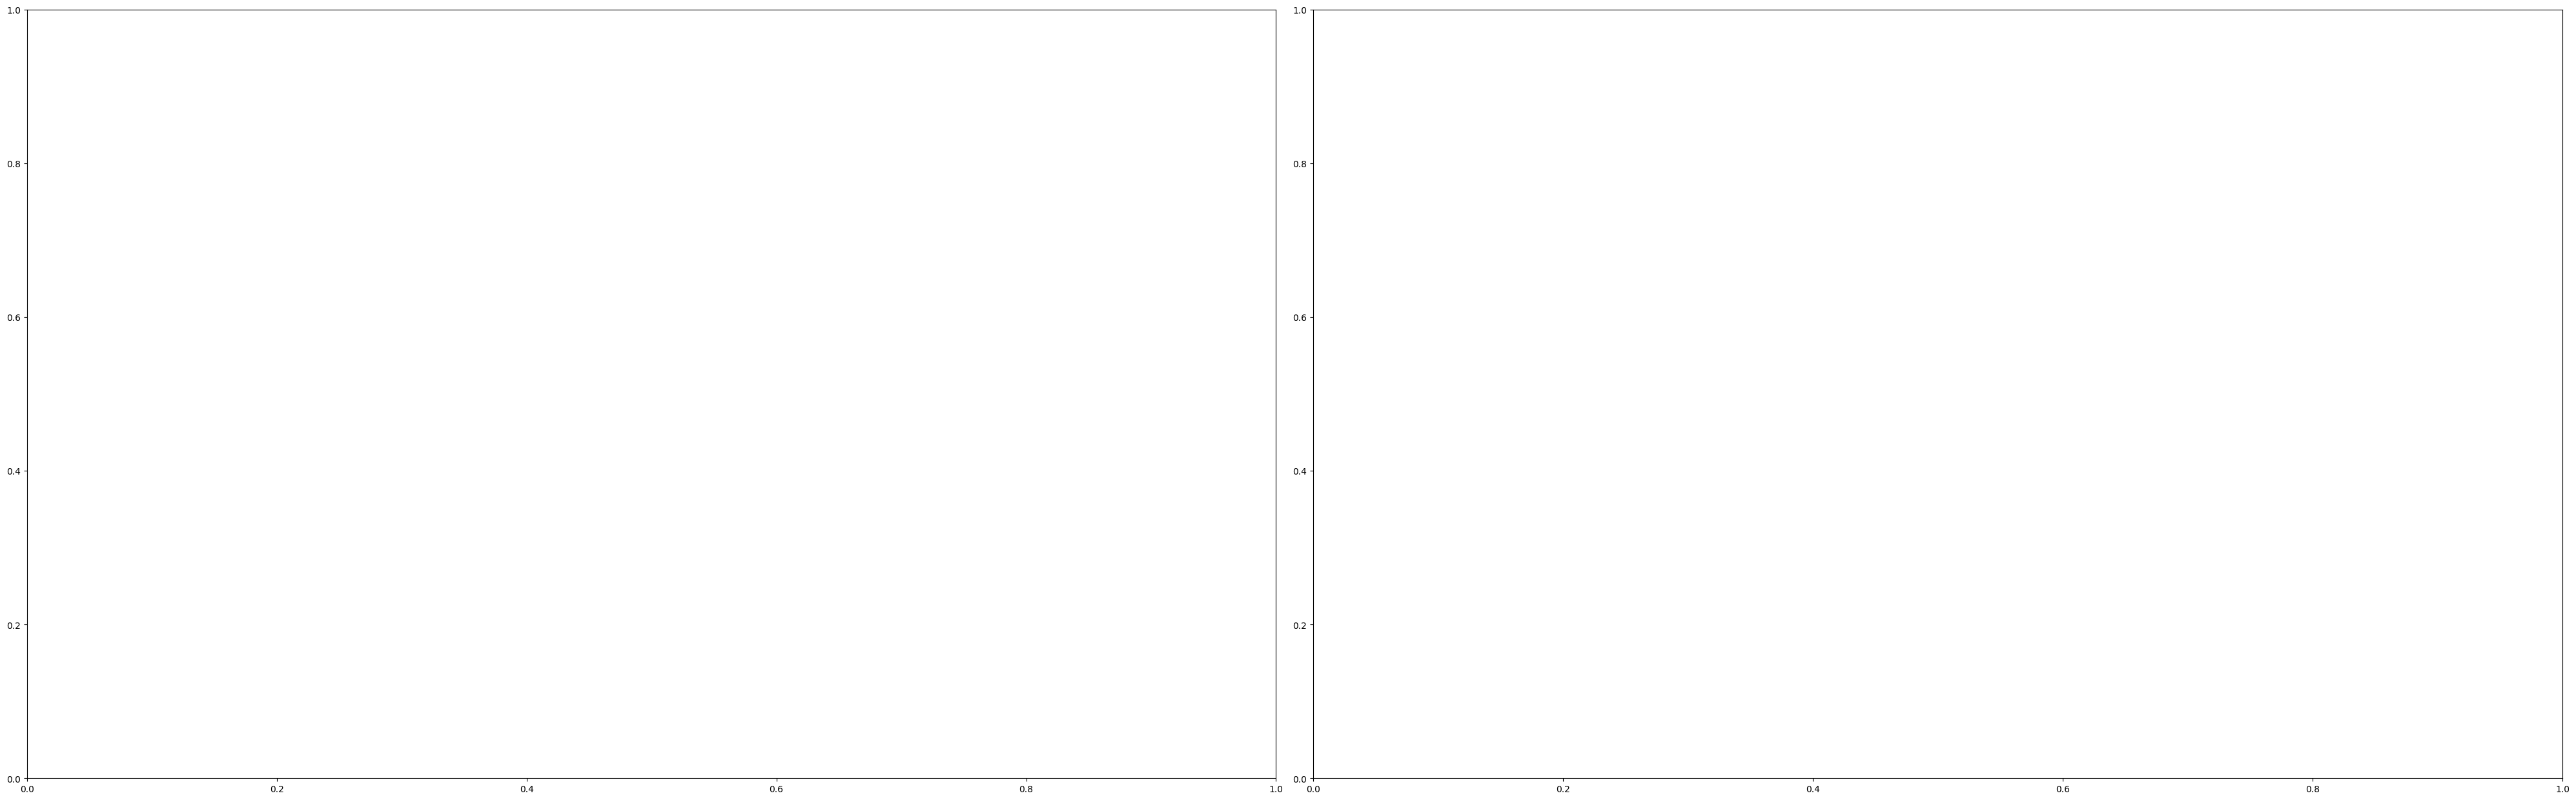

In [4]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(40, 12.5)
fig.tight_layout()

In [6]:
for i in range(1000, 1001):
    lfu_hits = pd.read_csv("csv_1000/LFU_Hits.csv")[:i]
    lru_hits = pd.read_csv("csv_1000/LRU_Hits.csv")[:i]
    lead_hits = pd.read_csv("csv_1000/LeadCache_Hits.csv")[:i]
    dpp_hits = pd.read_csv("93c033a27a/hit_rate.csv")[:i]
    ftpl_hits = pd.read_csv("csv_1000/hit_rate_ftpl.csv")[:i]

    plt.figure(figsize=(10*1.5, 7*1.5))
    plt.xlabel("Timeslot", fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.ylabel("Average Cache Hit", fontsize=30)
    plt.xlim(left=0, right=i+10)
    plt.ylim(bottom=0, top=1)
    plt.plot(ma(lead_hits), label="LeadCache", marker='d', markevery=50, markersize=10, c='green', linewidth=2)
    plt.plot(ma(lru_hits), label="LRU", marker='o', markevery=50, markersize=10, c='orange', linewidth=2)
    plt.plot(ma(lfu_hits), label="LFU", marker='x', markevery=50, markersize=10, c='blue', linewidth=2)
    plt.plot(ma(dpp_hits), label="DPP-cache", marker='^', markevery=50, markersize=10, c='purple', linewidth=2)
    plt.plot(ma(ftpl_hits), label="FTPL", marker='*', markevery=50, markersize=10, c='brown', linewidth=2)
    plt.legend(loc='lower right', prop={'size': 20})
    plt.grid()
    plt.savefig(f"dpp_gif_plot/cache_hit_{i}.jpg", bbox_inches='tight')
    plt.close()

## Second Plot

In [5]:
for i in range(800, 1001):
    lfu_downloads = pd.read_csv("csv_1000/LFU_Downloads.csv")[:i]
    lru_downloads = pd.read_csv("csv_1000/LRU_Downloads.csv")[:i]
    lead_downloads = pd.read_csv("csv_1000/LeadCache_Downloads.csv")[:i]
    dpp_downloads = pd.read_csv("93c033a27a//download_rate.csv")[:i]
    ftpl_downloads = pd.read_csv("csv_1000/download_rate_ftpl.csv")[:i]

    plt.figure(figsize=(10*1.5, 7*1.5))
    plt.xlabel("Timeslot", fontsize=30)
    plt.ylabel("Average Cache Replacement Rate", fontsize=30)
    plt.xlim(left=0, right=i+10)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.ylim(bottom=-0.005, top=0.8)
    plt.plot(ma(lfu_downloads), label="LFU", marker='x', markevery=50, markersize=15, c='blue', linewidth=2)
    plt.plot(ma(lru_downloads), label="LRU", marker='o', markevery=50, markersize=15, c='orange', linewidth=2)
    plt.plot(ma(lead_downloads), label="LeadCache", marker='d', markevery=50, markersize=15, c='green', linewidth=2)
    plt.plot(ma(dpp_downloads), label="DPP-cache", marker='^', markevery=50, markersize=15, c='purple', linewidth=2)
    plt.plot(ma(ftpl_downloads), label="FTPL", marker='*', markevery=50, markersize=15, c='brown', linewidth=2)
    plt.legend(loc='center right', prop={'size': 20})
    plt.grid()
    plt.savefig(f"dpp_gif_plot/cache_replace_rate_{i}.jpg", bbox_inches='tight')
    plt.close()

In [12]:
fig.tight_layout()
fig.savefig("combine.jpg")